In [1]:
##################################################################################################################
#                
#                           Feature Analyzer & Extractor : Gain Insights into Prominent Features
#
##################################################################################################################

# import modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os, warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# print_variances: Finds the average variance among all rows in each column
def print_variances(x_):
    variances = []
    fv = x_

    for col in fv.columns:
        # get actual column to work with
        column = fv[col]
        # encode the data in this column
        col_encoded = pd.get_dummies(column) 
        col_encoded.fillna(-1, inplace=True) # fill in NaN values
        # get the average variance for this column's encoded rows
        row_values = col_encoded.values # convert from dataframe to np array
        average_variance = np.var(row_values, axis=0).mean()

        variances.append(col + ': ' + str(average_variance))

    for var in variances:
        print(var)

# build_ngram_vector: Returns an n-gram matrix using CountVectorizer
def build_ngram_vector(x_):
    gram_count = x_
    gram_count = gram_count.dropna() # drop the NaN values before vectorizing

    ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2))
    ngram_vector = ngram_vectorizer.fit_transform(gram_count)  # extracted feature
    print(ngram_vectorizer.get_feature_names_out())
    return ngram_vector
    
# build_tfidf_vector: Returns a TD-IDF matrix using TfidfVectorizer
def build_tfidf_vector(x_): 
    tfidf = x_
    tfidf = tfidf.dropna() # drop the NaN values before vectorizing

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vector = tfidf_vectorizer.fit_transform(tfidf) # extracted feature
    print(tfidf_vectorizer.get_feature_names_out())
    return tfidf_vector

In [2]:
##################################################################################################################
#                
#                                           ANALYZING SPAM / PHISHING 
#
##################################################################################################################

# get all columns
y = pd.read_csv('email_features.csv')

# take a sample
X = y.sample(n=1000, random_state=42)

# email body
b = X['Body']

X.head(3)

,Subject,To,From,Date,CC,BCC,Message ID,In Reply To,References,Reply To,Sender,Received,Content Type,Content Encoding,Content Disposition,Body,Body Length
2882,日本銀行データ通信システム、代表理事 高木と申します。,bruce@bruce-guenter.dyndns.org,recent@q3byryq3rnqvi.link,"Sun, 01 May 2016 16:25:31 +0900",NaN,NaN,468874259_7727598571052417dabd@q3byryq3rnqvi.link,NaN,NaN,NaN,NaN,(qmail 23393 invoked from network); 1 May 2016...,"text/plain; charset=""Shift_JIS""",NaN,NaN,【日本銀行データ通信システム、代表理事 高木と申します。】\r\n\r\nhttp://q3...,308
3933,今日、携帯を買ってもらった現役の女子高生！！＼(^o^)／,lists-reiserfs-list@bruce-guenter.dyndns.org,mailhs5z@3bn40m28tx12neoc.shop,"Mon, 02 Apr 2018 09:24:59 +0900",NaN,NaN,<eQIIOUAIvAsFPI3c@3bn40m28tx12neoc.shop>,NaN,NaN,NaN,NaN,(qmail 20132 invoked from network); 2 Apr 2018...,"text/plain; charset=""Shift_JIS""",NaN,NaN,http://0gfvmvt81p7mniks.shop/syCVG80lQpK6gBUn,45
304,SHOOTERS: This thing aims the gun for you (Hur...,bruce@untroubled.org,Red Dot <RedDot@reddot.icu>,"Mon, 29 Apr 2019 12:14:09 -0400",NaN,NaN,<ezt9my6wvebanid5-wct4hljdxdfkho8r-217-127ae@r...,NaN,NaN,Red Dot <RedDot@reddot.icu>,NaN,(qmail 25017 invoked from network); 29 Apr 201...,"multipart/alternative; boundary=""9753b2b11066a...",NaN,NaN,SHOOTERS: This thing aims the gun for you (Hur...,3944


In [3]:
# Find the percentage of NaN values in columns
NaN_cols = X[X.columns[X.isnull().any()]].isnull().sum() * 100.00 / X.shape[0]
print(NaN_cols)

Subject                  1.2
To                       1.7
From                     1.2
Date                     3.9
CC                      99.8
BCC                     99.6
Message ID               4.3
In Reply To             99.8
References              99.5
Reply To                66.5
Sender                  96.3
Received                29.6
Content Type             1.4
Content Encoding       100.0
Content Disposition     99.3
Body                     2.5
dtype: float64


In [4]:
# Convert all types of data into numerical data
X_copy = X.copy()
X_encoded = pd.get_dummies(X_copy) # get_dummies creates default binary columns
X_encoded.fillna(-1, inplace=True) # fill in NaN values
X_encoded.head(3)

Content Encoding  Body Length  Subject_  جدول التدريب   \
2882              -1.0          308                        0   
3933              -1.0           45                        0   
304               -1.0         3944                        0   

      Subject_  جدول دورات دبي لعام 2022  \
2882                                   0   
3933                                   0   
304                                    0   

      Subject_ Haise Van：Search Co-investors Partners to invest Chain EV / Fuel Haise Van Series assembly plant in developing country,    \
2882                                                  0                                                                                    
3933                                                  0                                                                                    
304                                                   0                                                                                    

      Subject_ [username] $2k in bonuses! only today  \
2882                                               0   
3933                                               0   
304                                                0   

      Subject_ عیدی 410 هزار تومانی برای شما مدیریت محترم  \
2882                                                  0     
3933                                                  0     
304                                                   0     

      Subject_ 「メルカリ」ご利用環境確認用ワンタイムURLのお知らせ  \
2882                                     0   
3933                                     0   
304                                      0   

      Subject_ 【JCBカード】重要なお知らせ[メールコード MJ223981]  \
2882                                          0   
3933                                          0   
304                                           0   

      Subject_ 【au PAY マーケット】重要なお知らせ  ...  \
2882                               0  ...   
3933                               0  ...   
304                                0  ...   

      Body_�早y※祝※当選案内】＿さ＿ん＿よ＿り＿着＿信/\r\n只今サイトなどで自由にポイント追加を行える決済コード発行中！！▼受取はコチラから▼\r\n\r\n↓本＿文＿確＿認\r\nhttp://54tshsm0.top/%7ebl/message_detail/PC:312819957261c7b265b4/MC:5b37c8ffb3ec7a2c1319f186373c7103/?guid=ON\r\n\r\n\r\n\r\n\r\n\r\n\r\n  \
2882                                                  0                                                                                                                                                                                         
3933                                                  0                                                                                                                                                                                         
304                                                   0                                                                                                                                                                                         

      Body_�早y国−際／中−央＿銀＿行】＿さ＿ん＿よ＿り＿着＿信/\r\n振込依頼人『堀北まみ』様より1億8000万の振込依頼がありましたので、受取人様へご連絡をさせて頂いております。\r\n\r\n↓本＿文＿確＿認\r\nhttp://92upmvpa12.top/%7ebl/message_detail/PC:312819957261c7b265b4/MC:47fc935fc6d7062dd631de43e9b4ebe0/?guid=ON\r\n\r\n\r\n\r\n\r\n\r\n\r\n  \
2882                                                  0                                                                                                                                                                                                             
3933                                                  0                                                                                                                                                                                                             
304                                                   0                                                                                                                                                                       

In [5]:
# CountVectorizer: Extracts n-gram words/phrases
b_ngram_vector = build_ngram_vector(b.copy()) # b = email body

['00 00' '00 11' '00 15' ... 'ﾄｌﾙ 妹と二人で' 'ﾄｌﾙ 崎圭介様' 'ﾄｌﾙ 自分でl自ら管財人の手続きをして']


In [6]:
print(b_ngram_vector)

  (0, 76700)	1
  (0, 75568)	1
  (0, 77947)	1
  (0, 32679)	2
  (0, 52123)	2
  (0, 39115)	2
  (0, 5220)	1
  (0, 41541)	1
  (0, 49231)	2
  (0, 4442)	2
  (0, 41076)	2
  (0, 5140)	2
  (0, 29985)	2
  (0, 46891)	1
  (0, 77772)	1
  (0, 5221)	1
  (0, 53848)	1
  (0, 46892)	1
  (0, 77804)	1
  (1, 32337)	1
  (1, 343)	1
  (1, 56833)	1
  (2, 56743)	1
  (2, 64877)	1
  (2, 64574)	1
  :	:
  (974, 67713)	1
  (974, 45179)	1
  (974, 9471)	1
  (974, 62476)	1
  (974, 27817)	1
  (974, 37512)	1
  (974, 22119)	1
  (974, 16191)	1
  (974, 20008)	1
  (974, 21441)	1
  (974, 6786)	1
  (974, 59076)	1
  (974, 64438)	1
  (974, 57693)	1
  (974, 19553)	1
  (974, 63026)	1
  (974, 44367)	1
  (974, 16207)	1
  (974, 62110)	1
  (974, 19599)	1
  (974, 12170)	1
  (974, 70707)	1
  (974, 27818)	1
  (974, 68980)	1
  (974, 61952)	1


In [7]:
# TF-IDF: Term Frequency-Inverse Document Frequency 
b_tfidf_vector = build_tfidf_vector(b.copy()) # b = email body

['00' '000' '000080' ... 'ﾀｌｲｌﾄ' 'ﾃﾚ' 'ﾄｌﾙ']


In [8]:
print(b_tfidf_vector)

  (0, 24078)	0.13945112849358635
  (0, 24915)	0.13945112849358635
  (0, 16580)	0.13945112849358635
  (0, 24887)	0.13945112849358635
  (0, 14202)	0.1425026480157984
  (0, 9652)	0.23728262050527088
  (0, 2144)	0.4693678704997825
  (0, 12799)	0.2675914626420425
  (0, 1720)	0.3643073268349143
  (0, 14797)	0.2310609829822088
  (0, 12958)	0.13379573132102124
  (0, 2199)	0.27220122108408623
  (0, 12151)	0.23728262050527088
  (0, 15865)	0.2789022569871727
  (0, 10289)	0.08117858993614406
  (0, 25045)	0.2120603785824388
  (0, 22893)	0.2120603785824388
  (0, 23929)	0.2120603785824388
  (1, 18842)	0.683535180934544
  (1, 17672)	0.3206108113923203
  (1, 180)	0.6449903257522873
  (1, 10289)	0.11821947271535514
  (2, 18952)	0.029724706755624414
  (2, 5329)	0.02748675879754646
  (2, 10889)	0.028464359825741293
  :	:
  (974, 19193)	0.02973207280023586
  (974, 19958)	0.033236174941367755
  (974, 18324)	0.038392912166929895
  (974, 4851)	0.04226451489282252
  (974, 20840)	0.027027051301913112
  (974, 40

In [9]:
# Min-Max Normalization: Scale Data within the 0 - 1 range
X_ecopy = X_encoded.copy() 
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_ecopy)
X_mm_scaled = mm_scaler.transform(X_ecopy)
print(X_mm_scaled)

[[0.         0.01334142 0.         ... 0.         0.         0.        ]
 [0.         0.00194923 0.         ... 0.         0.         0.        ]
 [0.         0.17083947 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00874989 0.         ... 0.         0.         0.        ]
 [0.         0.00194923 0.         ... 0.         0.         0.        ]
 [0.         0.07537035 0.         ... 0.         0.         0.        ]]


In [10]:
# Feature Variance
print_variances(X)

Subject: 0.0011951296969696969
To: 0.01393601818181818
From: 0.0011775382775119619
Date: 0.00100526387434555
CC: 0.0009990000000000003
BCC: 0.001995000000000001
Message ID: 0.0010010879581151832
In Reply To: 0.0009990000000000003
References: 0.0009990000000000003
Reply To: 0.0010424267912772587
Sender: 0.0020396111111111114
Received: 0.000999
Content Type: 0.001428425787106447
Content Encoding: nan
Content Disposition: 0.006950999999999999
Body: 0.001039273212379936
Body Length: 0.0016418476821192054


/var/folders/nr/dw5ws37s3n11ff8f2jqpk60h0000gn/T/ipykernel_2101/2714207587.py:36: RuntimeWarning: Mean of empty slice.
  average_variance = np.var(row_values, axis=0).mean()
/Users/gelo/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/Users/gelo/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


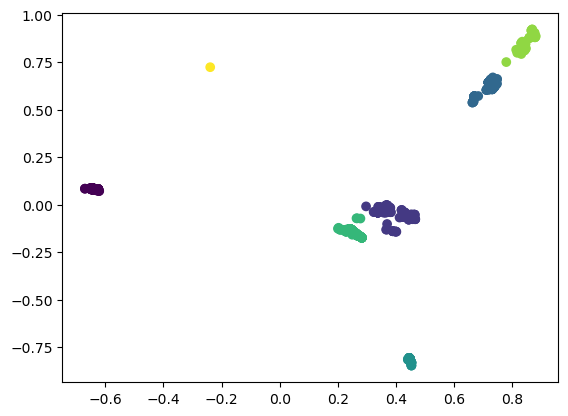

In [11]:
# take the encoded data and fit PCA to it
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_mm_scaled) # dimensions were reduced to 2

# use KMeans on the PCA data to get labels
kmeans = KMeans(n_clusters=7)
labels = kmeans.fit_predict(X_reduced)

# Plot the 2D PCA-reduced data
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels)
plt.show()

In [12]:
##################################################################################################################
#                
#                                           ANALYZING MALWARE
#
##################################################################################################################

# get all columns
W = pd.read_csv('pefile_features.csv')

# take a sample
# W = z.sample(n=1000, random_state=42)

s = W['byte_sequence']

W.head(3)

,filename,byte_sequence,Characteristics,IMAGE_FILE_16BIT_MACHINE,IMAGE_FILE_32BIT_MACHINE,IMAGE_FILE_AGGRESIVE_WS_TRIM,IMAGE_FILE_BYTES_REVERSED_HI,IMAGE_FILE_BYTES_REVERSED_LO,IMAGE_FILE_DEBUG_STRIPPED,IMAGE_FILE_DLL,...,b'advapi32.dll',b'user32.dll',b'kernel32.dll',b'kernel32.dll'.1,b'user32.dll'.1,b'kernel32.dll'.2,b'advapi32.dll'.1,b'comctl32.dll',b'kernel32.dll'.3,b'advapi32.dll'.2
0,sublime_text.exe,[ 77 90 80 ... 154 0 0],33167,False,True,False,True,True,False,False,...,"[<pefile.ImportData object at 0x7fa6e704e170>,...","[<pefile.ImportData object at 0x7fa6e704ea10>,...","[<pefile.ImportData object at 0x7fa6e7060550>,...","[<pefile.ImportData object at 0x7fa6e7061480>,...","[<pefile.ImportData object at 0x7fa6e70620e0>,...","[<pefile.ImportData object at 0x7fa6e706d000>,...","[<pefile.ImportData object at 0x7fa6e706e170>,...",[<pefile.ImportData object at 0x7fa6e706e800>],[<pefile.ImportData object at 0x7fa6e706ec20>],[<pefile.ImportData object at 0x7fa6e706ed10>]
1,zoom.exe,[ 77 90 144 ... 0 0 0],34,False,False,False,False,False,False,False,...,[<pefile.ImportData object at 0x7fa6e8a1ff70>],"[<pefile.ImportData object at 0x7fa6e8a2c100>,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kakaoTalk.exe,[ 77 90 144 ... 0 0 0],271,False,True,False,False,False,False,False,...,"[<pefile.ImportData object at 0x7fa6dd03f2e0>,...","[<pefile.ImportData object at 0x7fa6dd049b70>,...","[<pefile.ImportData object at 0x7fa6dd04a590>,...","[<pefile.ImportData object at 0x7fa6dd04a8c0>,...","[<pefile.ImportData object at 0x7fa6dd04b970>,...","[<pefile.ImportData object at 0x7fa6dd054370>,...",NaN,NaN,NaN,NaN


In [13]:
# Find the percentage of NaN values in columns
NaN_cols_ = W[W.columns[W.isnull().any()]].isnull().sum() * 100.00 / W.shape[0]
print(NaN_cols_)

b'kernel32.dll'      33.333333
b'kernel32.dll'.1    33.333333
b'user32.dll'.1      33.333333
b'kernel32.dll'.2    33.333333
b'advapi32.dll'.1    66.666667
b'comctl32.dll'      66.666667
b'kernel32.dll'.3    66.666667
b'advapi32.dll'.2    66.666667
dtype: float64


In [14]:
# Convert all types of data into numerical data
W_encoded = pd.get_dummies(W) # get_dummies creates default binary columns
W_encoded.fillna(-1, inplace=True) # fill in NaN values

In [15]:
# CountVectorizer: Extracts n-gram sequences
s_ngram_vector = build_ngram_vector(s.copy()) # s = bytecode sequence

['77 90' '80 154' '90 144' '90 80']


In [16]:
print(s_ngram_vector)

  (0, 0)	1
  (0, 3)	1
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 2)	1


In [17]:
# TF-IDF: Term Frequency-Inverse Document Frequency 
s_tfidf_vector = build_tfidf_vector(s.copy()) # s = bytecode sequence

['144' '154' '77' '80' '90']


In [18]:
print(s_tfidf_vector)

  (0, 1)	0.6088450986844796
  (0, 3)	0.6088450986844796
  (0, 4)	0.35959372325985667
  (0, 2)	0.35959372325985667
  (1, 0)	0.6732546652684398
  (1, 4)	0.5228423068642596
  (1, 2)	0.5228423068642596
  (2, 0)	0.6732546652684398
  (2, 4)	0.5228423068642596
  (2, 2)	0.5228423068642596


In [19]:
# Standard Normalization: Scaling to Unit Variance, Remove Mean
W_ecopy = W_encoded.copy() 
s_scaler = StandardScaler()
s_scaler.fit(W_ecopy)
W_s_scaled = s_scaler.transform(W_ecopy)
print(W_s_scaled)

[[ 1.41418623  0.          0.70710678  0.          1.41421356  1.41421356
   0.          0.          0.         -0.70710678  0.70710678  0.70710678
   0.          0.70710678  0.          0.          0.         -0.70710678
   1.06904497  0.          0.         -0.70710678 -1.27308353 -0.03019779
   0.         -0.7064898   0.67403966 -0.70710678  0.70710678 -0.70710678
  -0.70710678  0.          0.          0.         -1.41421356  0.
   0.70710678  0.70710678 -0.70710678  0.70710678 -0.70710678 -1.41421356
   0.          0.9258201  -0.70710678  1.41421356  0.         -0.70710678
   0.70710678 -0.70710678 -0.70710678  1.30369303 -0.70710678 -0.70710678
   0.70710678 -0.66234703 -0.3593564  -0.69451812  0.70710678 -0.70814283
  -0.70710678  1.41421356 -0.70710678  1.41421356 -1.41421356  1.41421356
  -0.70710678 -0.70710678  1.41421356 -0.70710678 -0.70710678  1.41421356
  -0.70710678 -0.70710678  1.41421356 -0.70710678 -0.70710678  1.41421356
  -0.70710678 -0.70710678  1.41421356 -0.70710

In [20]:
# Feature Variance
print_variances(W)

filename: 0.22222222222222224
byte_sequence: 0.22222222222222224
Characteristics: 0.22222222222222224
IMAGE_FILE_16BIT_MACHINE: 0.0
IMAGE_FILE_32BIT_MACHINE: 0.22222222222222224
IMAGE_FILE_AGGRESIVE_WS_TRIM: 0.0
IMAGE_FILE_BYTES_REVERSED_HI: 0.22222222222222224
IMAGE_FILE_BYTES_REVERSED_LO: 0.22222222222222224
IMAGE_FILE_DEBUG_STRIPPED: 0.0
IMAGE_FILE_DLL: 0.0
IMAGE_FILE_EXECUTABLE_IMAGE: 0.0
IMAGE_FILE_LARGE_ADDRESS_AWARE: 0.22222222222222224
IMAGE_FILE_LINE_NUMS_STRIPPED: 0.22222222222222224
IMAGE_FILE_LOCAL_SYMS_STRIPPED: 0.22222222222222224
IMAGE_FILE_NET_RUN_FROM_SWAP: 0.0
IMAGE_FILE_RELOCS_STRIPPED: 0.22222222222222224
IMAGE_FILE_REMOVABLE_RUN_FROM_SWAP: 0.0
IMAGE_FILE_SYSTEM: 0.0
IMAGE_FILE_UP_SYSTEM_ONLY: 0.0
Machine: 0.22222222222222224
NumberOfSections: 0.22222222222222224
NumberOfSymbols: 0.0
PointerToSymbolTable: 0.0
SizeOfOptionalHeader: 0.22222222222222224
TimeDateStamp: 0.22222222222222224
all_zeroes: 0.22222222222222224
dump: 0.22222222222222224
dump_dict: 0.22222222222

/Users/gelo/opt/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


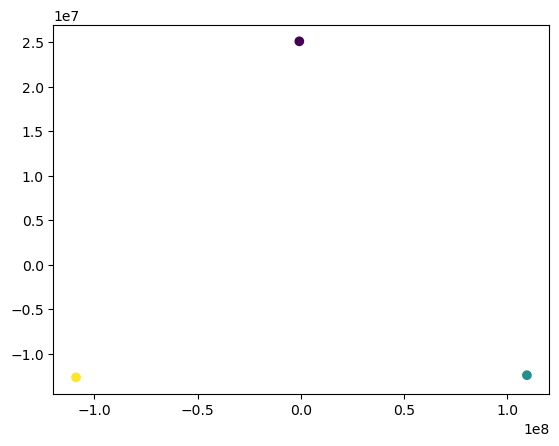

In [21]:
# take the encoded data and fit PCA to it
pca = PCA(n_components=2)
W_reduced = pca.fit_transform(W_encoded) # dimensions were reduced to 2

# use KMeans on the PCA data to get labels
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(W_reduced)

# Plot the 2D PCA-reduced data
plt.scatter(W_reduced[:,0], W_reduced[:,1], c=labels)
plt.show()